<a href="https://colab.research.google.com/github/Praveer1981/DeepLearning_TF/blob/main/Predict_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# import tensorflow, keras,  matplotlib library
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [ ]:
# load dataset
# reference :https://keras.io/api/datasets/
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape # there are 60k training data and the image is 32x32 pixel

In [ ]:
# plot few of the images of the numbers of the training dataset
plt.figure(figsize=(8, 8))
for i in range(4):
  plt.subplot(5, 2, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title('Class: ' + str(y_train[i]))
plt.show()


In [ ]:
# create the model
# reference https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# reference https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(10, activation=tf.nn.relu),  # input shape required
        tf.keras.layers.Dense(10, activation=tf.nn.sigmoid),
        # tf.keras.layers.Dense(10)
])

In [ ]:
# compile the model
# reference
# reference https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# reference https://www.tensorflow.org/api_docs/python/tf/keras/losses
# reference https://www.tensorflow.org/api_docs/python/tf/keras/metrics

model.compile(
      optimizer= 'adam',
      loss= 'SparseCategoricalCrossentropy',
      metrics= ['accuracy']
);

In [102]:
model.fit(x_train,y_train, epochs=5)
# here in the result we can see that the accuracy is not good, let's scale down the input data

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1233 - accuracy: 0.0988
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8244 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6922 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6376 - accuracy: 0.0988
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5892 - accuracy: 0.1009


In [103]:
x_train = x_train / 255
x_test = x_test / 255

In [104]:
model.fit(x_train,y_train, epochs=5) # this time is better and reached to 92%

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8698 - accuracy: 0.7312
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4177 - accuracy: 0.8834
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.9111
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2774 - accuracy: 0.9216
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2611 - accuracy: 0.9267


In [105]:
# let's evaluate the model on the test data
model.evaluate(x_test,y_test) # evaluation accuracy is 92% which  is good, that means our model is not overfitted

313/313 [==============================] - 1s 2ms/step - loss: 0.2478 - accuracy: 0.9276


[0.24777217209339142, 0.9276000261306763]

In [106]:
y_train[:5] # here we show the first 5 numbers in the ground truth and we can see that at the first position it is 5

array([5, 0, 4, 1, 9], dtype=uint8)

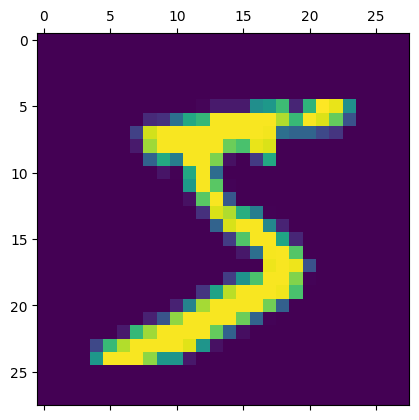

In [107]:
plt.matshow(x_train[0]) # Now, let's see what we get at the position in the input data, we got the 5

In [108]:
# now let's see how does our model predict on the test data
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [109]:
y_pred[:1]
# the output shows the value of 10 scores, in the Sequential function we had given value 10, which means that it it what that what is the probability
# to be 1 ,2 ,3, ....10 , highest the probaility value better the result

array([[2.6162213e-06, 2.4215335e-12, 4.3490136e-06, 8.1364386e-05,
        2.0286683e-09, 5.3255184e-07, 1.1336029e-14, 1.8510697e-02,
        2.7385124e-07, 8.7148655e-06]], dtype=float32)

In [110]:
np.argmax(y_pred[:1]) # wow it says that the highest probability to be 7

7

In [111]:
y_test[:1] # it is 7

array([7], dtype=uint8)

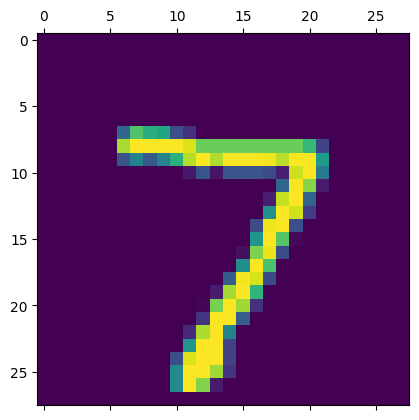

In [112]:
plt.matshow(x_test[0]) # Now, let's see what we get at the position in the input data, we got the 7

In [113]:
y_pred_lab = [np.argmax(i) for i in y_pred]

In [116]:
# y_pred_lab[0]

7

In [119]:
# let's ee how does it look like in the confuson matrix
# reference https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_lab)

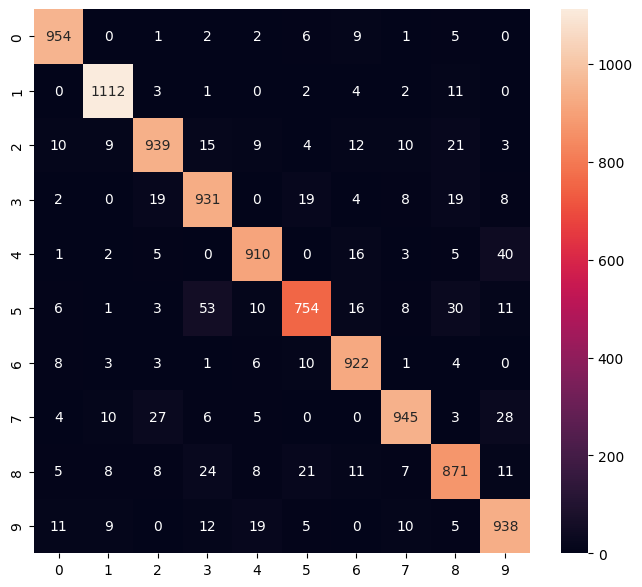

In [128]:
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True, fmt='d')

# Adjust spacing to prevent overlapping labels
plt.subplots_adjust(bottom=0.2)

plt.xlabel='Predictedvalue'
plt.ylabel='GroundTruth'
plt.show()
# here we can see that model has predicted 954 time 0 and the ground truth is also 0. However,
#there are 10 ocasion when ground truth was 2 and the predicted value was 0
# So, the conclusion is, any values which does not fall in the diagonal is the error